### Set 1

Reference : https://developers.arcgis.com/python/sample-notebooks/counting-features-in-satellite-images-using-scikit-image/


In [0]:
pip install arcgis

     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 194kB 38.5MB/s 
     |████████████████████████████████| 6.4MB 34.0MB/s 
     |████████████████████████████████| 2.3MB 34.8MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
  Created wheel for arcgis: filename=arcgis-1.6.2.post1-py2.py3-none-any.whl size=1722725 sha256=e0b7f228b38f5446973616740a8507d51ce77cffcf77bef12eb28d656d569316
  Stored in directory: /root/.cache/pip/wheels/f7/64/05/a36e62d3e3f043a30a1c92e43f82fde76a387e6478124c4ace
  Created wheel for pyshp: filename=pyshp-1.2.11-cp36-none-any.whl size=22463 sha256=6adfd10a1d94c5de409c68e1f9ffcdb312e4465c77c2a1cd47da6283980fee0e
  Stored in directory: /root/.cache/pip/wheels/e0/25/e1/c02348b30bde207b78388f29df97bdabb0567056fdd3e209d8
Successfully built arcgis pyshp
ERROR: jupyterlab-server 1.0.6 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.


In [0]:
# A geographic information system (GIS) is a framework for gathering, managing, and analyzing data. Rooted in the science of geography, GIS integrates many types of data. It analyzes spatial location and organizes layers of information into visualizations using maps and 3D scenes. ​With this unique capability, GIS reveals deeper insights into data, such as patterns, relationships, and situations—helping users make smarter decisions.
from arcgis.gis import GIS
agol = GIS()

In [0]:
l8 = agol.content.search('"Multispectral Landsat"', 'Imagery Layer')[0]
l8

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>

In [0]:
l8lyr = l8.layers[0]

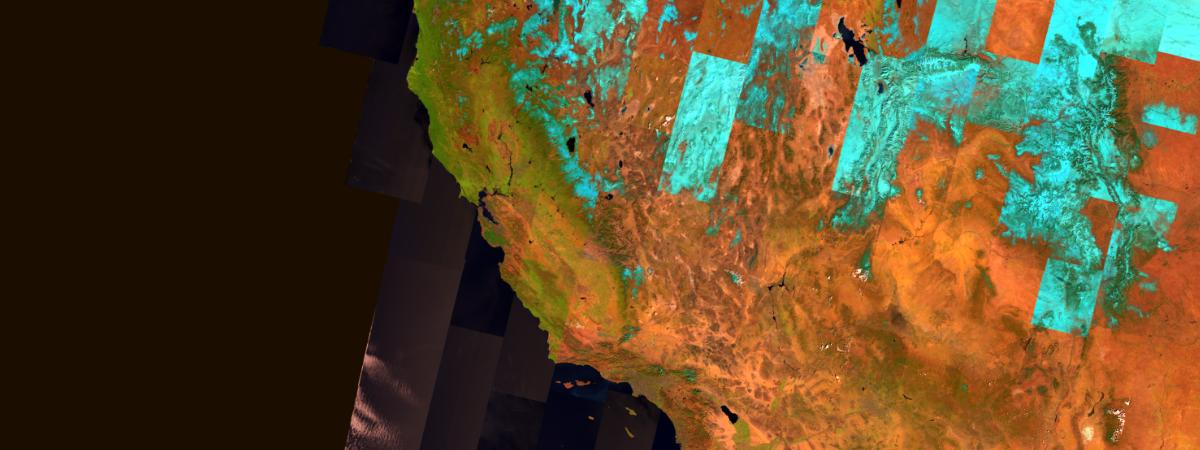

In [0]:
l8lyr.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                                         'type': 'extent',
                                         'xmax': -1.27048371963E7,
                                         'xmin': -1.3849389869100004E7,
                                         'ymax': 5162451.559199996,
                                         'ymin': 3833140.4826999977}
l8lyr

In [0]:
from arcgis.raster.functions import ndvi, stretch

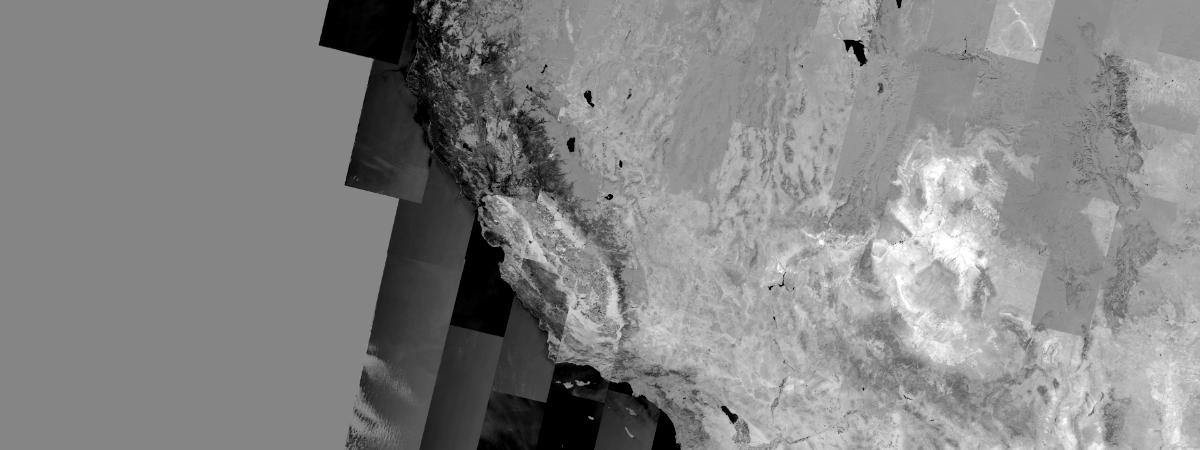

In [0]:
ndvi(l8lyr, band_indexes='4 3', astype=None)

In [0]:
img = stretch(ndvi(l8lyr), stretch_type='PercentClip', min_percent=30, max_percent=70, dra=True ).export_image(bbox=l8lyr.extent, bbox_sr=102100, size=[1200, 450],
                       export_format='jpeg', save_folder='.', save_file='centerpivotfarms.jpg', f='image')


## Sample code - Not applicable to our study

#### Blob detection using scikit-image  -- 

The code below uses scikit-image library to find blobs in the given grayscale image, and reports the number of farms thus detected. It also plots them for visualization using matplotlib.

Blobs are found using the Difference of Gaussian (DoG) method

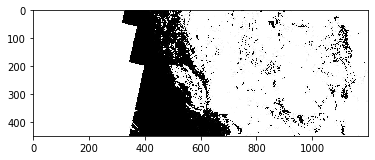

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('centerpivotfarms.jpg')

# what does it look like?
plt.imshow(img)
plt.show()

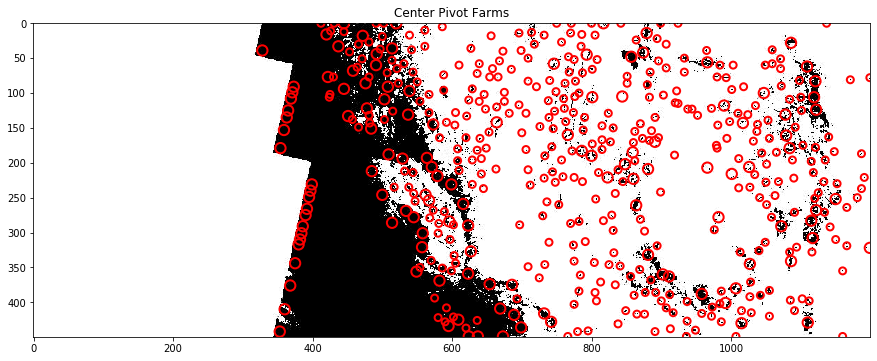

Number of center pivot farms detected: 483


In [0]:
from skimage import feature, color
import matplotlib.pyplot as plt
bw = img.mean(axis=2)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)

blobs_dog = [(x[0],x[1],x[2]) for x in feature.blob_dog(-bw, 
                                                        min_sigma=4, 
                                                        max_sigma=8,
                                                        threshold=0.1,
                                                        overlap=0.6)]

#remove duplicates
blobs_dog = set(blobs_dog)

img_blobs = color.gray2rgb(img)

for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r+1, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

plt.imshow(img_blobs)
plt.title('Center Pivot Farms')

plt.show()
print('Number of center pivot farms detected: ' + str(len(blobs_dog)))

## Set 2

Using Landsat data

Reference: https://developers.arcgis.com/python/guide/raster-analysis-advanced-concepts/

In [0]:
pip install bokeh

In [0]:
'''gis1 = GIS('https://python.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')
landsat_item = gis1.content.search('Multispectral Landsat', 'Imagery Layer', outside_org=True)[0]
landsat_item'''

"gis1 = GIS('https://python.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')\nlandsat_item = gis1.content.search('Multispectral Landsat', 'Imagery Layer', outside_org=True)[0]\nlandsat_item"

In [0]:
'''# View Landsat imagery layer item description
from IPython.display import HTML
import pandas as pd
HTML(landsat_item.description)'''

'# View Landsat imagery layer item description\nfrom IPython.display import HTML\nimport pandas as pd\nHTML(landsat_item.description)'

In [0]:
# Access the layers available with the Landsat Imagery Layer item

'''landsat = landsat_item.layers[0]
landsat'''

'landsat = landsat_item.layers[0]\nlandsat'

In [0]:
# Explore different wavelength bands

'''pd.DataFrame(landsat.key_properties()['BandProperties'])

# Visualize the area
m = gis.map('Redlands, CA')
m'''

"pd.DataFrame(landsat.key_properties()['BandProperties'])\n\n# Visualize the area\nm = gis.map('Redlands, CA')\nm"

In [0]:
'''m.add_layer(landsat)'''

'm.add_layer(landsat)'

## Set 3

#### MODIS data processing

Reference: NASA Earthdata Official site, LP DAAC

In [0]:
# Import libraries
#  https://www.esri.com/en-us/what-is-gis/overview  - GIS
#  https://lpdaac.usgs.gov/tools/appeears/   
import os
import glob # to get the full file path
from osgeo import gdal # https://wiki.osgeo.org/wiki/OSGeo_Python_Library
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import pandas as pd
import datetime as dt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

In [0]:
cd '/content/gdrive/My Drive/Data/TerraAqua MODIS Data'

In [0]:
!ls -l '/content/gdrive/My Drive/Data/TerraAqua MODIS Data'

In [0]:
# Set input directory, and change working directory
inDir = '/content/gdrive/My Drive/Data/TerraAqua MODIS Data'          # IMPORTANT: Update to reflect directory on your OS
os.path.isdir(inDir)                                                               # Change to working directory
outDir = os.path.normpath(os.path.split(inDir)[0] + os.sep + 'output') + '\\' # Create and set output directory
if not os.path.exists(outDir): os.makedirs(outDir)

In [0]:
NDVIFiles = glob.glob('MOD13Q1.006__250m_16_days_NDVI_**.tif') # Search for and create a list of NDVI files
LCTFiles =  glob.glob('MCD12Q1.006_LC**.tif')   # Search for and create a list of LCT files
NDVIFiles

In [0]:
NDVI = gdal.Open(NDVIFiles[0])                    # Read file in, starting with MOD13Q1 version 6
NDVIBand = NDVI.GetRasterBand(1)                  # Read the band (layer)
NDVIData = NDVIBand.ReadAsArray().astype('float') # Import band as an array with type float

In [0]:
print(NDVIFiles[0])

In [0]:
# File name metadata:
productId = NDVIFiles[0].split('_')[0]                                          # First: product name
layerId = NDVIFiles[0].split(productId + '_')[1].split('_doy')[0]               # Second: layer name
yeardoy = NDVIFiles[0].split(layerId+'_doy')[1].split('_aid')[0]                # Third: date
aid = NDVIFiles[0].split(yeardoy+'_')[1].split('.tif')[0]                       # Fourth: unique ROI identifier (aid)
date = dt.datetime.strptime(yeardoy, '%Y%j').strftime('%m/%d/%Y')              # Convert YYYYDDD to MM/DD/YYYY
print('Product Name: {}\nLayer Name: {}\nDate of Observation: {}'.format(productId, layerId, date))

In [0]:
# File Metadata
NDVI_meta = NDVI.GetMetadata()                   # Store metadata in dictionary
rows, cols = NDVI.RasterYSize, NDVI.RasterXSize  # Number of rows,columns

# Projection information
geotransform = NDVI.GetGeoTransform()
proj= NDVI.GetProjection() 

# Band metadata
NDVIFill = NDVIBand.GetNoDataValue()            # Returns fill value
NDVIStats = NDVIBand.GetStatistics(True, True)  # returns min, max, mean, and standard dNDVIation
NDVI = None                                    # Close the GeoTIFF file
print('Min NDVI: {}\nMax NDVI: {}\nMean NDVI: {}\nSD NDVI: {}'.format(NDVIStats[0],NDVIStats[1], NDVIStats[2], NDVIStats[3]))

### Applying scale factors

In [0]:
scaleFactor = float(NDVI_meta['scale_factor'])  # Search the metadata dictionary for the scale factor 
units = NDVI_meta['units']                      # Search the metadata dictionary for the units
NDVIData[NDVIData == NDVIFill] = np.nan           # Set the fill value equal to NaN for the array
NDVIScaled = NDVIData * scaleFactor              # Apply the scale factor using simple multiplication

# Generate statistics on the scaled data
NDVIStats_sc = [np.nanmin(NDVIScaled), np.nanmax(NDVIScaled), np.nanmean(NDVIScaled), np.nanstd(NDVIScaled)] # Create a list of stats
print('Min NDVI: {}\nMax NDVI: {}\nMean NDVI: {}\nSD NDVI: {}'.format(NDVIStats_sc[0],NDVIStats_sc[1], NDVIStats_sc[2], NDVIStats_sc[3]))

### Filtering data

In [0]:
lut = glob.glob('**lookup.csv')                                        # Search for look up table 
qualityFiles =glob.glob('MOD13Q1.006__250m_16_days_VI_Quality**.tif')  # Search the directory for the associated quality .tifs
quality = gdal.Open(qualityFiles[0])                                   # Open the first quality file
qualityData = quality.GetRasterBand(1).ReadAsArray()                   # Read in as an array
quality = None                                                         # Close the quality file

In [0]:
lut

In [0]:
v6_QA_lut = pd.read_csv(lut[0])     # Read in the lut
v6_QA_lut.head()                    # print the first few rows of the pandas dataframe

### Masking by quality

In [0]:
# Include good quality based on MODLAND
v6_QA_lut = v6_QA_lut[v6_QA_lut['MODLAND'].isin(['VI produced with good quality', 'VI produced, but check other QA'])]

# Exclude lower quality VI usefulness
VIU =["Lowest quality","Quality so low that it is not useful","L1B data faulty","Not useful for any other reason/not processed"]
v6_QA_lut = v6_QA_lut[~v6_QA_lut['VI Usefulness'].isin(VIU)]

v6_QA_lut = v6_QA_lut[v6_QA_lut['Aerosol Quantity'].isin(['Low','Average'])]   # Include low or average aerosol
v6_QA_lut = v6_QA_lut[v6_QA_lut['Adjacent cloud detected'] == 'No' ]           # Include where adjacent cloud not detected
v6_QA_lut = v6_QA_lut[v6_QA_lut['Mixed Clouds'] == 'No' ]                      # Include where mixed clouds not detected
v6_QA_lut = v6_QA_lut[v6_QA_lut['Possible shadow'] == 'No' ]                   # Include where possible shadow not detected
v6_QA_lut

In [0]:
goodQuality = list(v6_QA_lut['Value']) # Retrieve list of possible QA values from the quality dataframe
print(goodQuality)

In [0]:
NDVI_masked = np.ma.MaskedArray(NDVIScaled, np.in1d(qualityData, goodQuality, invert = True))    # Apply QA mask to the NDVI data

Masking by land cover

In [0]:
LCT = gdal.Open(LCTFiles[0])                              # Open the 2008 land cover type 1 file
LCTData = LCT.GetRasterBand(1).ReadAsArray()              # Read the file as an array
year =LCTFiles[0].split('_doy')[1].split('_aid')[0][0:4]  # Grab the year from the file name
LCT_resampled = scipy.ndimage.zoom(LCTData, 2, order=0)   # Resample by a factor of 2 with nearest neighbor interpolation

# Cropland =12 for Land Cover Type 1 (https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mcd12q1)
cropland = 12 

# Resampling leads to 1 extra row and column, so delete first row and last column to align arrays
LCT_resampled = np.delete(LCT_resampled, 0, 0)
LCT_resampled = np.delete(LCT_resampled, 3121, 1)
NDVI_crops = np.ma.MaskedArray(NDVI_masked, np.in1d(LCT_resampled, cropland, invert = True)) # Mask array, only include Croplands
LCT = None       

# masked_img = cv2.bitwise_and(src,src,mask=mask)                 COULD USE

### Visualization and statistics

In [0]:
# Set matplotlib plots inline
%matplotlib inline 

In [0]:
plt.imshow(NDVIScaled);  # Visualize a basic plot of the scaled NDVI data

In [0]:
# Add parameters
plt.figure(figsize = (10,7.5))    # Set the figure size (x,y)
plt.axis('off')                   # Remove the axes' values

# Plot the array, using a colormap and setting a custom linear stretch based on the min/max NDVI values
plt.imshow(NDVIScaled, vmin = np.nanmin(NDVIScaled), vmax = np.nanmax(NDVIScaled), cmap = 'YlGn');

In [0]:
#Plot the quality-filtered, land cover-masked NDVI array, add a title/subtitle and colormap legend, and export to a .png file in the output directory.
fig = plt.figure(figsize=(10,6.5))                                                                 # Set the figure size
plt.axis('off')                                                                                    # Remove the axes' values
fig.suptitle('MODIS Version 6 NDVI Quality-Filtered Cropland Data', fontsize=16, fontweight='bold') # Make a figure title
ax = fig.add_subplot(111)                                                                          # Make a subplot
fig.subplots_adjust(top=3.8)                                                                       # Adjust spacing
ax.set_title('Northern California: {}'.format(date), fontsize=12, fontweight='bold')                              # Add figure subtitle
ax1 = plt.gca()                                                                                    # Get current axes

# Plot the masked data, using a colormap and setting a custom linear stretch based on the min/max NDVI values
im = ax1.imshow(NDVI_crops, vmin=NDVI_crops.min(), vmax=NDVI_crops.max(), cmap='YlGn');

# Add a colormap legend
plt.colorbar(im, orientation='horizontal', fraction=0.047, pad=0.004, label='NDVI', shrink=0.6).outline.set_visible(True)

# Set up file name and export to png file
# fig.savefig('{}{}.png'.format(outDir, (NDVIFiles[0].split('.tif'))[0]), bbox_inches='tight')

In [0]:
# Multiple plots to compare original versus quality-masked croplands-only data
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 5.5), sharey=True, sharex=True) # Set subplots with 1 row & 2 columns
axes[0].axis('off'), axes[1].axis('off')                                                   # Turn off axes' values

# Add a title for the plots
figure.suptitle('MODIS Version 6 Normalized Vegetation Index (NDVI): {}'.format(date), fontsize=20, fontweight='bold')

axes[0].set_title('Original Data', fontsize=14, fontweight='bold')                  # Set the first subplot title
axes[1].set_title('Quality-Filtered Cropland Data', fontsize=14, fontweight='bold') # Set the second subplot title
axes[0].imshow(NDVIScaled, vmin=-0.2, vmax=1.0, cmap='YlGn');                        # Plot original data
axes[1].imshow(NDVI_crops, vmin=-0.2, vmax=1.0, cmap='YlGn');                        # Plot Quality-filtered data

### Generating statistics

In [0]:
# An array that only includes quality-filtered, cropland pixels
NDVI_crops2 = NDVI_crops.data[~NDVI_crops.mask]    # Exclude non-cropland pixel values
NDVI_crops2 = NDVI_crops2[~np.isnan(NDVI_crops2)]  # Exclude poor quality pixel values

In [0]:
# Use Numpy functions to calculate statistics on the quality-masked, croplands-only data
n = len(NDVI_crops2)                                                        # Count of array
min_val = float(format((np.min(NDVI_crops2)), '.4f'))                       # Minimum value in array
max_val = float(format((np.max(NDVI_crops2)), '.4f'))                       # Maximum value in array
range_val = (min_val, max_val)                                             # Range of values in array
mean = float(format((np.mean(NDVI_crops2)), '.4f'))                         # Mean of values in array
std = float(format((np.std(NDVI_crops2)), '.4f'))                           # Standard dNDVIation of values in array
var = float(format((np.var(NDVI_crops2)), '.4f'))                           # Variance of values in array
median = float(format((np.median(NDVI_crops2)), '.4f'))                     # Median of values in array
quartiles = np.percentile(NDVI_crops2, [25, 75])                            # 1st (25) and 3rd (75) quartiles of values in array 
upper_quartile = float(format((quartiles[1]), '.4f'))                      
lower_quartile = float(format((quartiles[0]), '.4f'))                      
iqr = quartiles[1] - quartiles[0]                                          # Interquartile range
iqr_upper = upper_quartile + 1.5 * iqr                                     # 1.5 IQR of the upper quartile
iqr_lower = lower_quartile - 1.5 * iqr                                     # 1.5 IQR of the lower quartile
top = float(format(np.max(NDVI_crops2[NDVI_crops2 <= iqr_upper]), '.4f'))    # Highest datum still within 1.5 IQR of upper quartile
bottom = float(format(np.min(NDVI_crops2[NDVI_crops2 >= iqr_lower]), '.4f')) # Lowest datum still within 1.5 IQR of lower quartile

In [0]:
# Set up a dictionary with names (keys) for each statistic calculated above, and assign each statistic to the correct name (key)
d = {'File Name':(NDVIFiles[0]), 'Dataset': layerId, 'aid': aid, 'Date': date, 'Count':n, 'Minimum':min_val, 'Maximum':max_val,
     'Range':range_val, 'Mean':mean, 'Median':median, 'Upper Quartile':upper_quartile, 'Lower Quartile':lower_quartile,
     'Upper 1.5 IQR':top, 'Lower 1.5 IQR':bottom, 'Standard DNDVIation':std, 'Variance':var}
for dd in d: print(dd + ' = ' + str(d[dd]))  # Print the results from calculating statistics

In [0]:
# Set up a pandas dataframe to store the statistics and import the statistics from the dictionary created above.
# Create dataframe
stats_df = pd.DataFrame(columns=['File Name', 'Dataset', 'aid', 'Date', 'Count', 'Minimum', 'Maximum', 'Range', 'Mean','Median',
                        'Upper Quartile', 'Lower Quartile', 'Upper 1.5 IQR', 'Lower 1.5 IQR', 'Standard DNDVIation', 'Variance'])
stats_df = stats_df.append(d, ignore_index=True) # Append the dictionary to the dataframe

In [0]:
# calculate and print the frequency distribution of land cover type 1 values from 2019 in Northern California
LCTData = LCTData[LCTData!=255]                    # Exclude fill value
freq_dist = np.unique(LCTData, return_counts=True) # find the unique values in the LCT array and return counts

for i in range(len(freq_dist[0])):print('Value: {}, Count: {}'.format(freq_dist[0][i], freq_dist[1][i]))  # Print values/counts


### Visualizing statistics

In [0]:
# Basic plot
plt.boxplot(NDVI_crops2); # Basic boxplot

In [0]:
# Add important items such as a title, different colors, and labels
fig = plt.figure(1, figsize=(10, 7.5))            # Set the figure size
ax = fig.add_subplot(111)                         # Create a subplot
box = ax.boxplot(NDVI_crops2, patch_artist=True);  # Add the boxplot of quality-filtered, croplands-only data

# Set boxplot attributes similar to the AppEEARS UI.
for b in box['boxes']: b.set( color='#333333', linewidth=2), b.set(facecolor='#2794D8')  # Set box outline and fill color
for m in box['medians']: m.set(color='#333333', linewidth=2)                             # Set color/linewidth of medians
for w in box['whiskers']: w.set(color='#333333', linewidth=2), w.set_linestyle(':')      # Set color/linewidth of whiskers
for c in box['caps']: c.set(color='#333333', linewidth=2)                                # Set color/linewidth of caps
for f in box['fliers']: f.set(marker='o', color='#cccccc', alpha=0.5)                    # Set the style of fliers    
ax.set_xticklabels([date],fontsize=14, fontweight='bold')                                # Add date to x-axis
ax.set_xlabel('Date', fontsize=16, fontweight='bold')                                    # Add label to x-axis
ax.set_ylabel("{}({})".format(layerId, units), fontsize=16, fontweight='bold')           # Add label/units to y-axis
ax.set_title('Layer Stats', fontsize=20, fontweight='bold');                             # Add title

In [0]:
# For categorical layers, such as land cover type 1, AppEEARS creates stacked bar charts, shown below.
# Add stacked bar chart
n = len(np.unique(LCTData))                             # Get the number of unique values in the LCT array
LCTchart = [[year]*n, freq_dist[0], freq_dist[1]]       # Create an array with year, values, and counts
row = list(zip(LCTchart[0], LCTchart[1], LCTchart[2]))  # Zip the data together
headers = ['Year', 'Count', 'Value']                    # Set the headers

# Use the pivot function to reconfigure data for plotting
lct_df = pd.DataFrame(row, columns=headers).pivot(index='Year', columns='Count', values='Value')
ax = lct_df.loc[:,freq_dist[0]].plot.bar(stacked=True,colormap='Paired',figsize=(10,7.5),title='Layer Stats'); # Reorder layers


# Add a title and x/y labels
ax.set_ylabel("Pixel Count", fontsize=12, fontweight='bold');  # Add y-axis label
ax.set_xlabel('Year', fontsize=12, fontweight='bold');         # Add x-axis label
ax.set_title('Layer Stats', fontsize=16, fontweight='bold');   # Add title

In [0]:
# Delete variables that will not be needed in the next section
del LCTData, freq_dist, NDVI_crops2, LCTchart, axes, dd, headers, i, n, lct_df, row, stats_df, min_val, max_val
del range_val, mean, std, var, median, quartiles, upper_quartile, lower_quartile, iqr, iqr_upper, iqr_lower, top, bottom
del NDVI_crops,  NDVIScaled, NDVI_masked, v6_QA_lut, VIU, lut, NDVIStats_sc, NDVI_meta, NDVIStats, d, box

## Working with Time Series (Automation)

Automate some of the steps above to get multiple growing seasons worth of data for visualization and statistical analysis.

In [0]:
print('Loop through and process {} files in the time series.'.format(len(NDVIFiles)))

### Batch processing
Begin by reconfiguring the original NDVI and quality arrays to include a third dimension, which we will ultimately use to stack multiple observations into a three-dimensional array.

In [0]:
date = list([date])                       # Convert from string to a list
NDVIData = NDVIData[np.newaxis,:,:]         # Add a third axis for stacking rasters
qData = qualityData[np.newaxis,:,:]       # Add a third axis for stacking rasters
del qualityData

In [0]:
'''Use a for loop to iterate through the remaining NDVI files. First, open the next NDVI file and corresponding quality layer in chronological order, 
read in as an array, add the third axis, and use the Numpy library function np.append to combine each file into a multi-dimensional array.
'''
# Loop through and perform processing steps for all NDVI and corresponding quality layers
for i in range(1, len(NDVIFiles)): 
    NDVI, q = gdal.Open(NDVIFiles[i]), gdal.Open(qualityFiles[i])                                   # Read files in
    NDVIb,qb = NDVI.GetRasterBand(1).ReadAsArray().astype('float'),q.GetRasterBand(1).ReadAsArray() # Read layers, import as array
    NDVIb, qb = NDVIb[np.newaxis,:,:], qb[np.newaxis,:,:]                                           # Add a third axis
    NDVIData, qData = np.append(NDVIData, NDVIb, axis=0), np.append(qData,qb, axis=0)                # Append to 'master' 3d array 
    del NDVIb, qb                                                                                  # Delete intermediate arrays
    NDVI, q = None, None                                                                           # Close files   
    yeardoy = NDVIFiles[i].split(layerId + '_doy')[1].split('_aid')[0]                             # parse filename for date
    date.append(dt.datetime.strptime(yeardoy,'%Y%j').strftime('%m/%d/%Y'))                        # Add to list of dates
NDVIData[NDVIData == NDVIFill] = np.nan                                                              # If NDVI = fill, set to nan   
NDVIScaled = NDVIData * scaleFactor                                                                 # Apply scale factor
del NDVIData, yeardoy


To automate land cover masking, first bring in each of the annual Land Cover Type 1 layers and stack into three-dimensional array by year.

In [0]:
LCT_resampled = LCT_resampled[np.newaxis,:,:]  # Add a third axis for first year LCT array from above
year = [year]                                  # Convert string to list to store each year
LCTFiles

Loop through and open each of the remaining five (annual) files above and stack into a three-dimensional array.

In [0]:
for i in range(1, len(LCTFiles)):
    LCT = gdal.Open(LCTFiles[i])                                 # Read file in                              
    LCTb = LCT.GetRasterBand(1).ReadAsArray()                    # Import LCT layer as array
    LCTb = scipy.ndimage.zoom(LCTb, 2, order=0)                  # Resample by a factor of 2 with nearest neighbor interpolation
    LCTb = np.delete(LCTb, 0, 0)                                 # Resampling leads to 1 extra row and column, 
    LCTb = np.delete(LCTb, 3121, 1)                              # So delete first row and last column to align arrays
    LCTb = LCTb[np.newaxis,:,:]                                  # Add a third axis
    LCT_resampled = np.append(LCT_resampled,LCTb, axis = 0)      # Append to 'master' 3d array
    del LCTb                                                     # Delete intermediate array   
    LCT = None                                                   # Close file
    yeardoy =LCTFiles[i].split('_doy')[1].split('_aid')[0][0:4]  # Parse filename for year
    year.append(yeardoy)                                         # Append to list of years
del LCTFiles, qualityFiles

Next, loop through and use a nested for loop to filter the NDVI files by quality and land cover type. The nested for loop is used to loop through each year to mask the NDVI data using the corresponding Land Cover Type 1 file by year.

In [0]:
i = 0 # Set up our iterator

# Apply QA mask to the NDVI data
for x in range(LCT_resampled.shape[0]):
    for i in range(i,i+12):  # 12 observations per year, so every 12th observation use the next year for LCT masking
        if i == 0:
            NDVI_masked = np.ma.MaskedArray(NDVIScaled[i],np.in1d(qData[i],goodQuality,invert=True))       # Quality mask
            NDVI_crops = np.ma.MaskedArray(NDVI_masked,np.in1d(LCT_resampled[x], cropland, invert = True)) # Crop mask
            NDVI_crops = NDVI_crops[np.newaxis,:,:]                                                        # Add third axis
        else: 
            NDVI_m = np.ma.MaskedArray(NDVIScaled[i], np.in1d(qData[i], goodQuality, invert = True))       # Quality mask
            NDVI_c = np.ma.MaskedArray(NDVI_m, np.in1d(LCT_resampled[x], cropland, invert = True))         # Crop mask    
            NDVI_c = NDVI_c[np.newaxis,:,:]                                                                # Add third axis 
            NDVI_crops = np.ma.concatenate((NDVI_crops,NDVI_c))                                             # Add to master array  
            del NDVI_m, NDVI_c
        i = i + 1
del LCT_resampled, NDVIScaled, cropland, goodQuality, qData

## Visualizing MODIS Time Series
Now, take an entire growing season of quality-filtered croplands-only arrays, and plot together.

In [0]:
figure, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 8), sharey=True, sharex=True) # Set up subplots w/ 3 rows x 4 columns

# Add a title for the series of plots
figure.suptitle('MODIS Version 6 Enhanced Vegetation Index: {}-{}'.format(date[0],date[11]), fontsize=22, fontweight='bold')

# Set the subplot titles
axes[0][0].set_title(date[0],fontsize=18,fontweight='bold'),axes[0][1].set_title(date[1],fontsize=18,fontweight='bold')
axes[0][2].set_title(date[2],fontsize=18,fontweight='bold'),axes[0][3].set_title(date[3],fontsize=18,fontweight='bold')
axes[1][0].set_title(date[4],fontsize=18,fontweight='bold'),axes[1][1].set_title(date[5],fontsize=18,fontweight='bold')
axes[1][2].set_title(date[6],fontsize=18,fontweight='bold'),axes[1][3].set_title(date[7],fontsize=18,fontweight='bold')
axes[2][0].set_title(date[8],fontsize=18,fontweight='bold'),axes[2][1].set_title(date[9],fontsize=18,fontweight='bold')
axes[2][2].set_title(date[10],fontsize=18,fontweight='bold'),axes[2][3].set_title(date[11],fontsize=18,fontweight='bold')

# Plot each observation
axes[0][0].imshow(NDVI_crops[0],vmin=-0.2,vmax=1.0,cmap='YlGn'),axes[0][1].imshow(NDVI_crops[1],vmin=-0.2,vmax=1.0,cmap='YlGn')
axes[0][2].imshow(NDVI_crops[2],vmin=-0.2,vmax=1.0,cmap='YlGn'),axes[0][3].imshow(NDVI_crops[3],vmin=-0.2,vmax=1.0,cmap='YlGn')
axes[1][0].imshow(NDVI_crops[4],vmin=-0.2,vmax=1.0,cmap='YlGn'),axes[1][1].imshow(NDVI_crops[5],vmin=-0.2,vmax=1.0,cmap='YlGn')
axes[1][2].imshow(NDVI_crops[6],vmin=-0.2,vmax=1.0,cmap='YlGn'),axes[1][3].imshow(NDVI_crops[7],vmin=-0.2,vmax=1.0,cmap='YlGn')
axes[2][0].imshow(NDVI_crops[8],vmin=-0.2,vmax=1.0,cmap='YlGn'),axes[2][1].imshow(NDVI_crops[9],vmin=-0.2,vmax=1.0,cmap='YlGn')
axes[2][2].imshow(NDVI_crops[10],vmin=-0.2,vmax=1.0,cmap='YlGn'),axes[2][3].imshow(NDVI_crops[11],vmin=-0.2,vmax=1.0,cmap='YlGn')

for x in axes.ravel(): x.axis("off") # Remove the axes' values

## Generating Statistics

Below, calculate a range of statistics that are available in AppEEARS. First set a pandas dataframe to store the statistics.

In [0]:
# Create dataframe with column names
stats_df = pd.DataFrame(columns=['File Name', 'Dataset', 'aid', 'Date', 'Count', 'Minimum', 'Maximum', 'Range','Mean','Median',
                        'Upper Quartile', 'Lower Quartile', 'Upper 1.5 IQR', 'Lower 1.5 IQR', 'Standard DNDVIation', 'Variance'])
NDVI_all = [] # Create empty list
i = 0        # Set up iterator

Below, use Numpy functions to calculate statistics on the quality-masked, croplands-only data. The format( , '4f') command will ensure that the statistics are rounded to four decimal places (same number as AppEEARS output statistics).

In [0]:
for e in NDVI_crops:
    NDVI_crops2 = e.data[~e.mask]                                            # Exclude non-cropland pixel values
    NDVI_crops2 = NDVI_crops2[~np.isnan(NDVI_crops2)]                          # Exclude poor quality pixel values
    n = len(NDVI_crops2)                                                     # Count of array
    min_val = float(format((np.min(NDVI_crops2)), '.4f'))                    # Minimum value in array
    max_val = float(format((np.max(NDVI_crops2)), '.4f'))                    # Maximum value in array
    range_val = (min_val, max_val)                                          # Range of values in array
    mean = float(format((np.mean(NDVI_crops2)), '.4f'))                      # Mean of values in array
    std = float(format((np.std(NDVI_crops2)), '.4f'))                        # Standard dNDVIation of values in array
    var = float(format((np.var(NDVI_crops2)), '.4f'))                        # Variance of values in array
    median = float(format((np.median(NDVI_crops2)), '.4f'))                  # Median of values in array
    quartiles = np.percentile(NDVI_crops2, [25, 75])                         # 1st (25) & 3rd (75) quartiles of values in array 
    upper_quartile = float(format((quartiles[1]), '.4f'))                      
    lower_quartile = float(format((quartiles[0]), '.4f'))                      
    iqr = quartiles[1] - quartiles[0]                                       # Interquartile range
    iqr_upper = upper_quartile + 1.5 * iqr                                  # 1.5 IQR of the upper quartile
    iqr_lower = lower_quartile - 1.5 * iqr                                  # 1.5 IQR of the lower quartile
    top = float(format(np.max(NDVI_crops2[NDVI_crops2 <= iqr_upper]), '.4f')) # Highest datum within 1.5 IQR of upper quartile
    bottom = float(format(np.min(NDVI_crops2[NDVI_crops2>=iqr_lower]),'.4f')) # Lowest datum within 1.5 IQR of lower quartile

    d = {'File Name':(NDVIFiles[i]),'Dataset': layerId,'aid': aid,'Date': date[i],'Count':n,'Minimum':min_val,'Maximum':max_val,
         'Range':range_val, 'Mean':mean,'Median':median,'Upper Quartile':upper_quartile,'Lower Quartile':lower_quartile,
         'Upper 1.5 IQR':top, 'Lower 1.5 IQR':bottom,'Standard DNDVIation':std, 'Variance':var}
    stats_df = stats_df.append(d, ignore_index=True)                        # Append the dictionary to the dataframe
    NDVI_all.append([NDVI_crops2])                                            # Append to quality-filtered croplands-only array
    i = i + 1
del d, n, min_val, max_val, range_val, mean, std, var, median, quartiles, upper_quartile, 
del bottom, NDVI_crops2, axes, e, yeardoy, lower_quartile, iqr, iqr_upper, iqr_lower, top

# Export statistics to CSV
#stats_df.to_csv('{0}{1}-Statistics.csv'.format(outDir, productId), index = False)   

### Visualizing Statistics
Below, recreate boxplot time series similar to those available in the AppEEARS UI. Later, demonstrate additional plots that can be generated.
Start by plotting a boxplot time series for all observations from 2019.

In [0]:
fig = plt.figure(1, figsize=(15, 7.5))               # Set the figure size
ax = fig.add_subplot(111)                            # Create a subplot
box = ax.boxplot(NDVI_all[0:12], patch_artist=True);  # Boxplot of quality-filtered croplands-only data for 1st 12 layers (2008)

# Set boxplot attributes similar the AppEEARS UI
for b in box['boxes']: b.set( color='#333333', linewidth=2), b.set(facecolor='#2794D8')  # Set box outline and fill color
for m in box['medians']: m.set(color='#333333', linewidth=2)                             # Set color/linewidth of medians
for w in box['whiskers']: w.set(color='#333333', linewidth=2), w.set_linestyle(':')      # Set color/linewidth of whiskers
for c in box['caps']: c.set(color='#333333', linewidth=2)                                # Set color/linewidth of caps
for f in box['fliers']: f.set(marker='o', color='#cccccc', alpha=0.5)                    # Set the style of fliers

ax.set_xticklabels(date,fontsize=14, fontweight='bold', rotation=45)                     # Add date to x-axis
ax.set_xlabel('Date', fontsize=16, fontweight='bold')                                    # Add label to x-axis
ax.set_ylabel("{}({})".format(layerId, units), fontsize=16, fontweight='bold')           # Add label/units to y-axis
ax.set_title('Layer Stats', fontsize=20, fontweight='bold');                             # Add title

# Set up file name and export to png file
fig.savefig('{}{}_{}_Boxplot_TimeSeries.png'.format(outDir, productId, layerId), bbox_inches='tight')

Next, use the prNDVIously calculated statistics to plot a time series of Mean NDVI for the six year time period.

In [0]:
fig = plt.figure(1, figsize=(25, 10))                                                      # Set the figure size
ax = fig.add_subplot(111)                                                                  # Create a subplot
ax.plot(stats_df['Mean'], 'k', lw=2.5, color='black')                                      # Plot as a black line
ax.plot(stats_df['Mean'], 'bo', ms=10, color='green')                                      # Plot as a green circle
ax.set_xticks((np.arange(0,len(NDVIFiles))))                                                # Set the x ticks
ax.set_xticklabels(date, rotation=45,fontsize=12)                                          # Set the x tick labels
ax.set_yticks((np.arange(0,1, 0.1)))                                                       # Arrange the y ticks
ax.set_yticklabels(np.arange(0,1, 0.1),fontsize=12,fontweight='bold')                      # Set the Y tick labels
ax.set_xlabel('Date',fontsize=16,fontweight='bold')                                        # Set x-axis label
ax.set_ylabel("{}({})".format(layerId, units),fontsize=16,fontweight='bold')               # Set y-axis label
ax.set_title('Layer Stats',fontsize=20,fontweight='bold')                                  # Set title
fig.savefig('{}{}_{}_Mean_TS.png'.format(outDir, productId, layerId), bbox_inches='tight') # Set up filename and export

Take the figure one step further, and plot the standard dNDVIation as a confidence interval around the mean NDVI as a time series.

In [0]:
fig = plt.figure(1, figsize=(25, 10))  # Set the figure size
dates = np.arange(0,len(NDVIFiles),1)   # Arrange all dates
ax = fig.add_subplot(111)              # Add subplot

# Add and subtract the standard dNDVIation from the mean to form the upper and lower intervals for the plot
ax.fill_between(dates,stats_df.Mean-stats_df['Standard DNDVIation'],stats_df.Mean+stats_df['Standard DNDVIation'],color='#254117') 

ax.plot(stats_df['Mean'], color="white", lw=2.5)                                             # Plot the mean NDVI as a white line
ax.set_xticks((np.arange(0,len(NDVIFiles))))                                                  # Arrange x ticks
ax.set_xticklabels(date, rotation=45,fontsize=12)                                            # Set x tick labels
ax.set_yticks((np.arange(0,1, 0.1)))                                                         # Arrange y ticks
ax.set_yticklabels(np.arange(0,1, 0.1),fontsize=12,fontweight='bold')                        # Set y-tick labels
ax.set_xlabel('Date',fontsize=16,fontweight='bold')                                          # Set x-axis label
ax.set_ylabel("{}({})".format(layerId, units),fontsize=16,fontweight='bold')                 # Set y-axis label
ax.set_title('Layer Stats',fontsize=20,fontweight='bold')                                    # Add title
fig.savefig('{}{}_{}_MeanStd_TS.png'.format(outDir, productId, layerId),bbox_inches='tight') # Set up filename & export

### Exporting Masked GeoTIFFs
Finally, after demonstrating how to filter data, calculate statistics, and create additional visuals, export the masked GeoTIFFs using a for loop.

In [0]:
o = 0 # Set up iterator
for tif in NDVI_crops:                                                               # Loop through each array, export to GeoTIFF
    tif.unshare_mask()                                                              # Split mask from data
    tif[tif.mask == True] = NDVIFill                                                 # Set masked values equal to fill value
    out_filename ='{}{}_Croplands.tif'.format(outDir,NDVIFiles[o].split('.tif')[0])  # Generate output filename 
    driver = gdal.GetDriverByName('GTiff')                                          # Select GDAL GeoTIFF driver
    outfile = driver.Create(out_filename, cols, rows, 1, gdal.GDT_Float32)          # Specify the parameters of the GeoTIFF
    outfile.SetGeoTransform(geotransform)                                           # Set Geotransform
    band = outfile.GetRasterBand(1)                                                 # Get band 1
    band.WriteArray(tif)                                                            # Write the array to band 1
    outfile.SetProjection(proj)                                                     # Set projection
    band.FlushCache()                                                               # Export data
    band.SetNoDataValue(NDVIFill)                                                    # Set fill value
    outfile = None                                                                  # Close file
    o = o + 1
del NDVI_crops, tif, NDVI_all